In [1]:
import datetime as dt
from datetime import date
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
#Getting the historical data from yahoo finance
today = date.today() 
print(today)
tdy = (today.strftime('%Y,%m,%d')).split(',')
print(tdy)
start = dt.datetime(1972,6,1)
end = dt.datetime(int(tdy[0]), int(tdy[1]), int(tdy[2]))

df = web.DataReader('SBIN.NS', 'yahoo', start , end)
print(df)

2022-07-13
['2022', '07', '13']
                  High         Low        Open       Close      Volume  \
Date                                                                     
1996-01-01   18.978922   18.540184   18.691147   18.823240  43733533.0   
1996-01-02   18.964767   17.738192   18.894005   18.224106  56167280.0   
1996-01-03   18.568489   17.643839   18.327892   17.738192  68296318.0   
1996-01-04   17.832542   17.223972   17.502312   17.676863  86073880.0   
1996-01-05   17.785366   17.459852   17.738192   17.577793  76613039.0   
...                ...         ...         ...         ...         ...   
2022-07-07  488.250000  481.600006  484.000000  486.750000  11497832.0   
2022-07-08  489.899994  485.149994  489.000000  488.549988   9057231.0   
2022-07-11  491.299988  485.000000  485.000000  488.200012   7704792.0   
2022-07-12  491.350006  483.100006  485.000000  484.950012   7364457.0   
2022-07-13  492.450012  484.549988  487.750000  486.500000   8208104.0   

     

In [3]:
l = list(df.index)

In [4]:
df = pd.DataFrame(df,columns=df.columns)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1996-01-01,18.978922,18.540184,18.691147,18.823240,43733533.0,12.651088
1996-01-02,18.964767,17.738192,18.894005,18.224106,56167280.0,12.248409
1996-01-03,18.568489,17.643839,18.327892,17.738192,68296318.0,11.921828
1996-01-04,17.832542,17.223972,17.502312,17.676863,86073880.0,11.880606
1996-01-05,17.785366,17.459852,17.738192,17.577793,76613039.0,11.814027


In [5]:
for i in range(1,30):
  predict_out = i
  df['Adj Close' + str(i)] = df[['Adj Close']].shift(-predict_out)


In [6]:
predict_out = 30
df['prediction']=df[['Adj Close']].shift(-predict_out)


In [7]:
x = np.array(df.drop(['prediction'],1))
x = x[:-predict_out]
print(x)

[[ 18.97892189  18.54018402  18.69114685 ...  14.73423862  15.1527729
   16.22447014]
 [ 18.96476746  17.7381916   18.89400482 ...  15.1527729   16.22447014
   15.27325726]
 [ 18.56848907  17.64383888  18.3278923  ...  16.22447014  15.27325726
   15.35569382]
 ...
 [476.8999939  471.1000061  473.         ... 479.95001221 486.75
  488.54998779]
 [476.3999939  465.         474.         ... 486.75       488.54998779
  488.20001221]
 [472.         464.70001221 468.         ... 488.54998779 488.20001221
  484.95001221]]


C:\Users\Aman Vishwakarma\AppData\Local\Temp\ipykernel_16480\1273835726.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['prediction'],1))


In [8]:
dfs = preprocessing.scale(x)

In [9]:
x= dfs
x

array([[-1.11525614, -1.10985353, -1.11319771, ..., -1.06498352,
        -1.06162746, -1.05297196],
       [-1.11536933, -1.11643768, -1.11155569, ..., -1.06157762,
        -1.05291066, -1.06070501],
       [-1.11853809, -1.1172123 , -1.11613804, ..., -1.05285646,
        -1.06064748, -1.06003483],
       ...,
       [ 2.54642485,  2.60554866,  2.56416177, ...,  2.7208045 ,
         2.77417606,  2.78688175],
       [ 2.5424267 ,  2.55546914,  2.57225618, ...,  2.77614079,
         2.78881652,  2.78403657],
       [ 2.50724296,  2.55300632,  2.52368975, ...,  2.79078856,
         2.78596994,  2.75761512]])

In [10]:
y = np.array(df['prediction'])
y = y[:-predict_out]
print(y)

[ 15.27325726  15.35569382  15.80593204 ... 488.20001221 484.95001221
 486.5       ]


In [11]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, shuffle=False)

In [12]:
x_test, x_predict, y_test, y_predict = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=False)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
lr_confidence = lr.score (x_test, y_test) 
print("lr confidence: ", lr_confidence)

lr confidence:  0.9489855318418379


In [16]:
rf = RandomForestRegressor(n_estimators=20,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [17]:

rf_confidence = rf.score (x_test, y_test) 
print("rf confidence: ", rf_confidence)

rf confidence:  0.7781785728995602


In [18]:
lr_prediction = lr.predict(x_predict)

In [19]:
rf_prediction = rf.predict(x_predict)

In [20]:
dateslice = y_predict.shape[0]
print(y_predict.shape)

(665,)


In [21]:
y_predictdf = pd.DataFrame(y_predict)
lr_predictiondf = pd.DataFrame(lr_prediction)
print(y_predictdf)

              0
0    299.322113
1    298.541595
2    314.054077
3    317.176086
4    322.346893
..          ...
660  486.750000
661  488.549988
662  488.200012
663  484.950012
664  486.500000

[665 rows x 1 columns]


In [22]:
y_predictdf = pd.DataFrame(y_predict)
rf_predictiondf = pd.DataFrame(rf_prediction)
print(y_predictdf)

              0
0    299.322113
1    298.541595
2    314.054077
3    317.176086
4    322.346893
..          ...
660  486.750000
661  488.549988
662  488.200012
663  484.950012
664  486.500000

[665 rows x 1 columns]


In [23]:
l = l[-dateslice:]
print(l)
dfdate = pd.DataFrame(l)
print(dfdate)
dfdate

[Timestamp('2019-11-13 00:00:00'), Timestamp('2019-11-14 00:00:00'), Timestamp('2019-11-15 00:00:00'), Timestamp('2019-11-18 00:00:00'), Timestamp('2019-11-19 00:00:00'), Timestamp('2019-11-20 00:00:00'), Timestamp('2019-11-21 00:00:00'), Timestamp('2019-11-22 00:00:00'), Timestamp('2019-11-25 00:00:00'), Timestamp('2019-11-26 00:00:00'), Timestamp('2019-11-27 00:00:00'), Timestamp('2019-11-28 00:00:00'), Timestamp('2019-11-29 00:00:00'), Timestamp('2019-12-02 00:00:00'), Timestamp('2019-12-03 00:00:00'), Timestamp('2019-12-04 00:00:00'), Timestamp('2019-12-05 00:00:00'), Timestamp('2019-12-06 00:00:00'), Timestamp('2019-12-09 00:00:00'), Timestamp('2019-12-10 00:00:00'), Timestamp('2019-12-11 00:00:00'), Timestamp('2019-12-12 00:00:00'), Timestamp('2019-12-13 00:00:00'), Timestamp('2019-12-16 00:00:00'), Timestamp('2019-12-17 00:00:00'), Timestamp('2019-12-18 00:00:00'), Timestamp('2019-12-19 00:00:00'), Timestamp('2019-12-20 00:00:00'), Timestamp('2019-12-23 00:00:00'), Timestamp('20

,0
0,2019-11-13
1,2019-11-14
2,2019-11-15
3,2019-11-18
4,2019-11-19
...,...
660,2022-07-07
661,2022-07-08
662,2022-07-11
663,2022-07-12


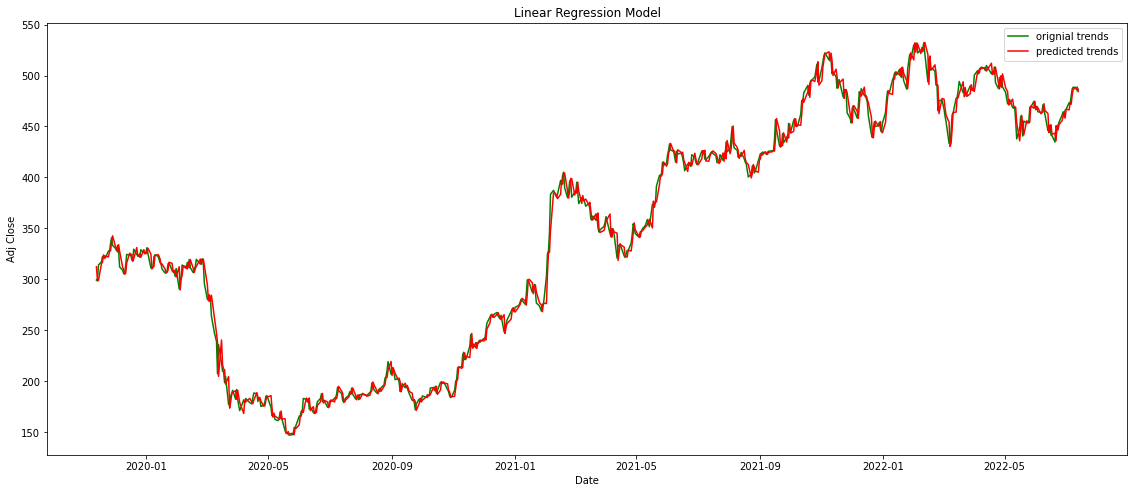

In [24]:
fig = plt.figure(figsize=(15,6))
ax1=fig.add_axes([0, 0, 1, 1])
ax1.set_title('Linear Regression Model')
ax1.plot(dfdate.to_numpy(),
         y_predictdf.to_numpy(),
         color='green', label='orignial trends')
ax1.plot(dfdate.to_numpy(),
         lr_predictiondf.to_numpy(),
         color='red', label='predicted trends')
ax1.set_xlabel('Date') 
ax1.set_ylabel('Adj Close') 
ax1.legend()
plt.show()

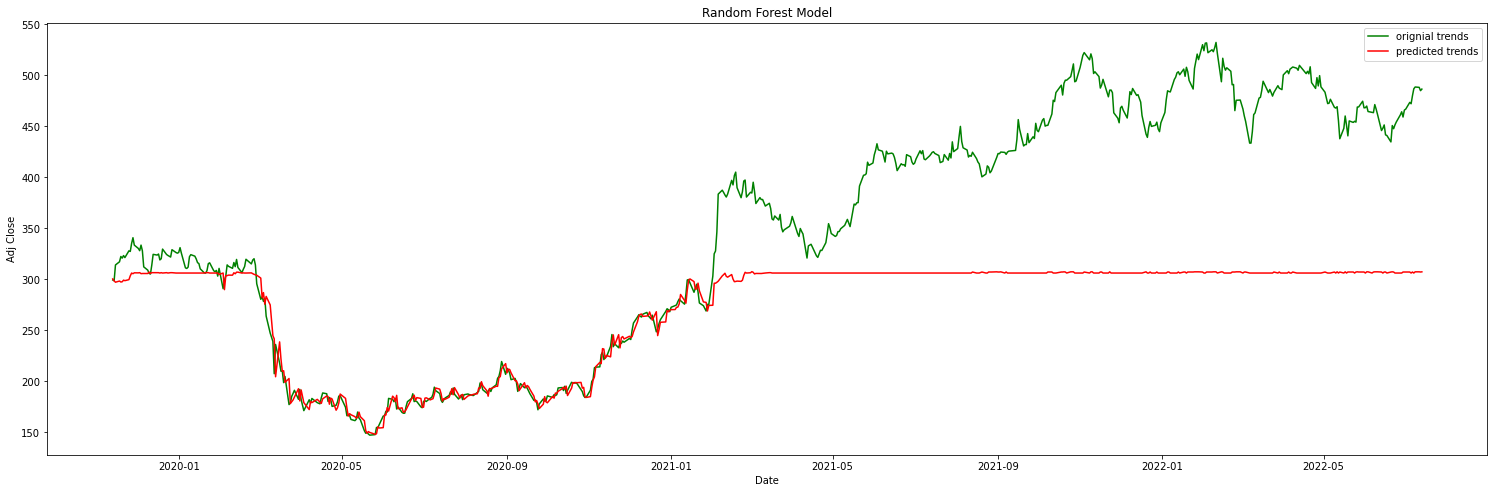

In [25]:
fig = plt.figure(figsize=(20,6))
ax2=fig.add_axes([0, 0, 1, 1])
ax2.set_title('Random Forest Model')
ax2.plot(dfdate.to_numpy(),
         y_predictdf.to_numpy(),
         color='green', label='orignial trends')
ax2.plot(dfdate.to_numpy(),
         rf_predictiondf.to_numpy(),
         color="red", label='predicted trends')
ax2.set_xlabel("Date") 
ax2.set_ylabel('Adj Close') 
ax2.legend()
plt.show()

In [31]:
Np=np.array(df)
n= 30
forcast=dfs[-n:]

output= lr.predict(forcast)

x_plot=[dt.datetime.now() + dt.timedelta(days=i) for i in range(30)]
y_plot=output

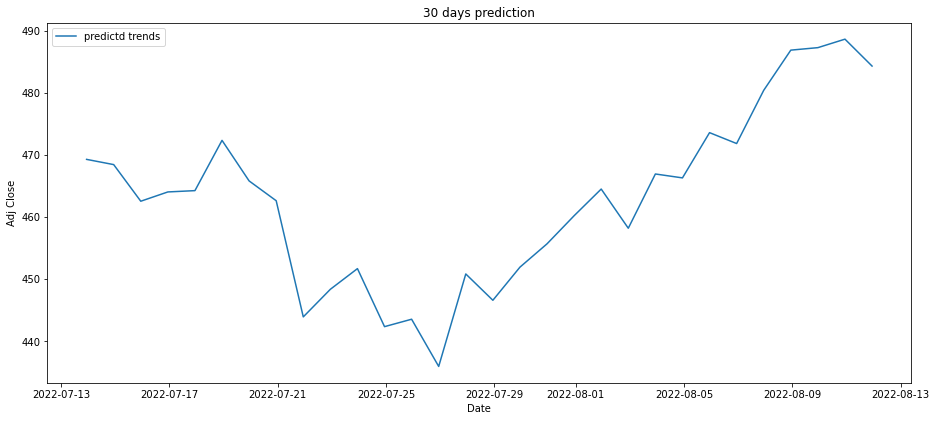

In [32]:
fig = plt.figure(figsize=(12,5))
ax3=fig.add_axes([0, 0, 1, 1])
ax3.set_title('30 days prediction')
ax3.plot(x_plot,y_plot,label='predictd trends')
ax3.set_xlabel("Date") 
ax3.set_ylabel('Adj Close') 
ax3.legend()
plt.show()